In [114]:
import numpy as np
import pandas as pd

from pprint import pprint
import random
from decision_tree_functions import decision_tree_algorithm, make_predictions, calculate_accuracy, post_pruning, filter_df
from helper_functions import generate_data, create_plot, train_test_split

# Adult Census Data Set (Classification Task)

## 1. Building a decision tree taking input "max_depth" from the user

### 1.1 Storing the dataset in a dataframe

In [115]:
header = ["age", "workclass", "fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","label"]
df = pd.read_csv('mldata1.csv',names=header)

Checking which attributes contain missing values

In [116]:
df = df.replace('?',np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       30724 non-null  object 
 2   fnlwgt          32560 non-null  float64
 3   education       32560 non-null  object 
 4   education_num   32560 non-null  float64
 5   marital_status  32560 non-null  object 
 6   occupation      30717 non-null  object 
 7   relationship    32560 non-null  object 
 8   race            32560 non-null  object 
 9   sex             32560 non-null  object 
 10  capital_gain    32560 non-null  float64
 11  capital_loss    32560 non-null  float64
 12  hours_per_week  32560 non-null  float64
 13  native_country  31977 non-null  object 
 14  label           32560 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


**The following attributes contain missing values:**
* workclass
* occupation
* native country

### 1.2 Handling missing values

In [117]:
mode_workclass = df.workclass.mode()[0]
mode_occupation = df.occupation.mode()[0]
mode_native_country = df.native_country.mode()[0]

df = df.fillna({"workclass": mode_workclass, "occupation": mode_occupation, "native_country": mode_native_country})

### 1.3 Taking max_depth as input

In [118]:
max_depth = int(input("Enter max_depth: "))

Enter max_depth: 6


### 1.4 Splitting dataset into train, validation and test sets

In [119]:
metrics = {"index": [], "acc_tree": []}

train_dfs = []
val_dfs = []
test_dfs = []

df = df[:2000]

max_accuracy = 0.0

for i in range(10):
    
    df_train, df_test = train_test_split(df,test_size=0.2)
    df_traion, df_val = train_test_split(df_train,test_size=0.2)
    
    train_dfs.append(df_train)
    val_dfs.append(df_val)
    test_dfs.append(df_test)
    
    tree = decision_tree_algorithm(df_train, ml_task="classification", max_depth = max_depth)
    
    accuracy = calculate_accuracy(df_test,tree)
    
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        best_tree = tree
    
    metrics["index"].append(i)
    metrics["acc_tree"].append(accuracy)
    
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index("index")

### 1.5 Choosing the best tree

Average accuracy:  0.8130000000000001
Best accuracy:  0.83
{'marital_status = Married-civ-spouse': [{'capital_gain <= 5013.0': [{'education_num <= 11.0': [{'age <= 32': [{'hours_per_week <= 46.0': [{'capital_loss <= 1573.0': ['<=50K',
                                                                                                                                                                       '>50K']},
                                                                                                                                           '<=50K']},
                                                                                                               {'hours_per_week <= 39.0': [{'occupation = Tech-support': ['>50K',
                                                                                                                                                                          '<=50K']},
                                                                               

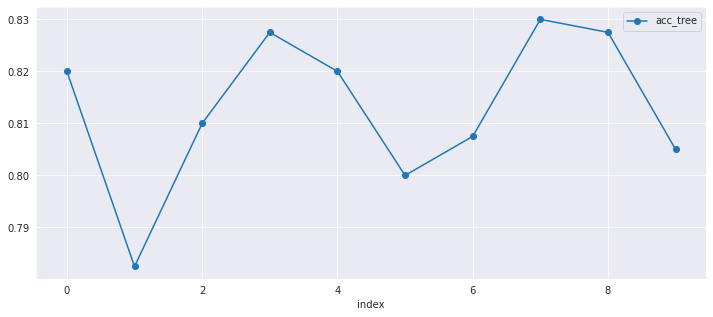

In [120]:
df_metrics.plot(figsize=(12,5),marker="o")
print("Average accuracy: ", sum(metrics["acc_tree"])/10)
print("Best accuracy: ", max_accuracy)
pprint(best_tree)

## 2. Choosing the best possible depth limit

In [121]:
def best_avg_accuracy(train_dfs, test_dfs, max_depth):
    
    accs = []
    max_accuracy = 0.0
    
    for i in range(10):
        tree = decision_tree_algorithm(train_dfs[i], ml_task="classification", max_depth = max_depth)

        accuracy = calculate_accuracy(test_dfs[i],tree)

        if max_accuracy < accuracy:
            max_accuracy = accuracy
            best_tree = tree
            best_split = i
            
    avg_acc = sum(accs)/10
    
    return avg_acc, best_tree, best_split

**Ranging the possible depth limit from 10 to 25**

In [122]:
metrics = {"max_depth": [], "acc_tree": []}
best_trees = []
best_splits = [] 

best_test_dfs = []
best_train_dfs = []
best_val_dfs = []

for n in range(10,26):
    
    #avg_acc, best_tree, best_split = best_avg_accuracy(train_dfs, test_dfs, n)
    
    df_train, df_test = train_test_split(df, test_size = 0.2)
    df_train, df_val = train_test_split(df_train, test_size = 0.2)
    
    tree = decision_tree_algorithm(df_train, ml_task="classification", max_depth=n)
 
    metrics["max_depth"].append(n)
    #metrics["acc_tree"].append(avg_acc)
    metrics["acc_tree"].append(calculate_accuracy(df_test, tree))
    
    best_trees.append(tree)
    #best_splits.append(best_split)
    
    best_train_dfs.append(df_train)
    best_val_dfs.append(df_val)
    best_test_dfs.append(df_test)
    
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.set_index("max_depth")

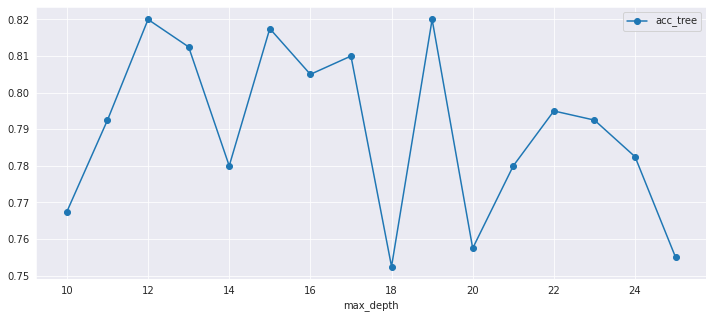

In [123]:
df_metrics.plot(figsize=(12,5),marker="o")

**The best depth-limit is 19**

## 3. Pruning

In [133]:
tree_pruned = post_pruning(best_trees[2], best_train_dfs[9], best_val_dfs[9], ml_task="classification")

In [134]:
calculate_accuracy(best_test_dfs[9], best_trees[9])

0.82

In [135]:
calculate_accuracy(best_test_dfs[9], tree_pruned)

0.86

## 4. Printing Final Decision Tree

In [127]:
pprint(tree_pruned)

{'marital_status = Married-civ-spouse': [{'capital_gain <= 5013.0': [{'education_num <= 11.0': [{'education_num <= 8.0': ['<=50K',
                                                                                                                          {'age <= 31': ['<=50K',
                                                                                                                                         {'hours_per_week <= 40.0': [{'workclass = Self-emp-inc': ['>50K',
                                                                                                                                                                                                   {'capital_loss <= 1740.0': [{'hours_per_week <= 16.0': ['<=50K',
                                                                                                                                                                                                                                                           {'occupat